Importing the necessary libraries

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 10)

In [2]:
import requests as r
from bs4 import BeautifulSoup as soup

Retrieving Messi's injury data from Transfermarkt using a scraper I built.

In [3]:
injury_data = []
headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
for page_number in range (1,4):
    url = f"https://www.transfermarkt.com/lionel-messi/verletzungen/spieler/28003/ajax/yw1/sort/saison_id.desc/page/{page_number}"
    print(url)
    pageTree = r.get(url, headers=headers)
    pageSoup = soup(pageTree.content, 'html.parser')
    #injury_data = pageSoup.find_all("tr", {'class': 'odd'})
    header_1 = pageSoup.find_all("th", {'id': 'yw1_c0'})
    header_2 = pageSoup.find_all("th", {"id": "yw1_c1"})
    header_3 = pageSoup.find_all("th", {'id': 'yw1_c2'})
    header_4 = pageSoup.find_all("th", {'id': 'yw1_c3'})
    header_5 = pageSoup.find_all("th", {'id': 'yw1_c4'})
    header_6 = pageSoup.find_all("th", {'id': 'yw1_c5'})

    full_injury_data = header_1 + header_2 + header_3 + header_4 + header_5 + header_6 + injury_data
    
    
    injury_data_odd_row = pageSoup.find_all("tr", {'class': 'odd'})
    injury_data_even_row = pageSoup.find_all("tr", {'class': 'even'})

    for row in injury_data_odd_row + injury_data_even_row:
        season = row.find("td", {'class': 'zentriert'}).text.strip()
        injury = row.find("td", {'class': 'hauptlink'}).text.strip()
        start_date = row.find_all("td")[2].text.strip()
        end_date = row.find_all("td")[3].text.strip()
        duration = row.find_all("td")[4].text.strip()
        games_missed = row.find_all("td")[5].text.strip()

        print("season:", season)
        print("injury:", injury)
        print("start_date:", start_date)
        print("end_date:", end_date)
        print("duration:", duration)
        print("games_missed:", games_missed)
        print()
        
        injury_data.append({
            'season': season,
            'injury': injury,
            'start_date': start_date,
            'end_date': end_date,
            'duration_in_days': duration,
            'games_missed': games_missed,
        })

df = pd.DataFrame(injury_data)
df.to_csv('injury_data.csv', index=False)
display(df)

https://www.transfermarkt.com/lionel-messi/verletzungen/spieler/28003/ajax/yw1/sort/saison_id.desc/page/1
season: 22/23
injury: Calf Problems
start_date: Oct 5, 2022
end_date: Oct 13, 2022
duration: 8 days
games_missed: 3

season: 22/23
injury: Rest
start_date: Dec 26, 2022
end_date: Jan 3, 2023
duration: 8 days
games_missed: 2

season: 21/22
injury: Fitness
start_date: Aug 1, 2021
end_date: Aug 26, 2021
duration: 25 days
games_missed: 4

season: 21/22
injury: Knee Problems
start_date: Oct 29, 2021
end_date: Nov 11, 2021
duration: 13 days
games_missed: 3

season: 21/22
injury: Quarantine
start_date: Jan 6, 2022
end_date: Jan 20, 2022
duration: 14 days
games_missed: 2

season: 21/22
injury: Flu
start_date: Mar 17, 2022
end_date: Mar 24, 2022
duration: 7 days
games_missed: 1

season: 20/21
injury: Hamstring Injury
start_date: Jan 12, 2021
end_date: Jan 15, 2021
duration: 3 days
games_missed: 1

season: 19/20
injury: Adductor problems
start_date: Sep 25, 2019
end_date: Oct 1, 2019
duratio

,season,injury,start_date,end_date,duration_in_days,games_missed
0,22/23,Calf Problems,"Oct 5, 2022","Oct 13, 2022",8 days,3
1,22/23,Rest,"Dec 26, 2022","Jan 3, 2023",8 days,2
2,21/22,Fitness,"Aug 1, 2021","Aug 26, 2021",25 days,4
3,21/22,Knee Problems,"Oct 29, 2021","Nov 11, 2021",13 days,3
4,21/22,Quarantine,"Jan 6, 2022","Jan 20, 2022",14 days,2
...,...,...,...,...,...,...
37,12/13,Hamstring Injury,"Apr 3, 2013","Apr 22, 2013",19 days,4
38,10/11,Stretched Ligament,"Sep 20, 2010","Sep 27, 2010",7 days,2
39,07/08,Hamstring Injury,"Dec 17, 2007","Jan 14, 2008",28 days,6
40,06/07,Metatarsal Fracture,"Nov 13, 2006","Feb 8, 2007",87 days,19


Checking the data types of columns

In [4]:
df.dtypes

season              object
injury              object
start_date          object
end_date            object
duration_in_days    object
games_missed        object
dtype: object

I attempted to convert the data within the 'games_missed' and 'duration_in_days' columns to the integer type for visualization purposes.

This resulted in an error because the scraper recorded a '-' character instead of 0 in the 'games_missed' column for injuries that did not cause Messi to miss any matches.

In [5]:
df['games_missed'] = df['games_missed'].astype(int)
df['duration_in_days'] = df['duration_in_days'].astype(int)

ValueError: invalid literal for int() with base 10: '-'

I replaced the '-' character with 0 in the 'games_missed' column and the string 'days' with an empty string in the 'duration_in_days' column. 

These changes made it possible to convert the data in both columns to the integer type.

In [6]:
df = df.replace('-', 0)

In [7]:
df['games_missed'] = df['games_missed'].astype(int)
display(df)
df.dtypes

,season,injury,start_date,end_date,duration_in_days,games_missed
0,22/23,Calf Problems,"Oct 5, 2022","Oct 13, 2022",8 days,3
1,22/23,Rest,"Dec 26, 2022","Jan 3, 2023",8 days,2
2,21/22,Fitness,"Aug 1, 2021","Aug 26, 2021",25 days,4
3,21/22,Knee Problems,"Oct 29, 2021","Nov 11, 2021",13 days,3
4,21/22,Quarantine,"Jan 6, 2022","Jan 20, 2022",14 days,2
...,...,...,...,...,...,...
37,12/13,Hamstring Injury,"Apr 3, 2013","Apr 22, 2013",19 days,4
38,10/11,Stretched Ligament,"Sep 20, 2010","Sep 27, 2010",7 days,2
39,07/08,Hamstring Injury,"Dec 17, 2007","Jan 14, 2008",28 days,6
40,06/07,Metatarsal Fracture,"Nov 13, 2006","Feb 8, 2007",87 days,19


season              object
injury              object
start_date          object
end_date            object
duration_in_days    object
games_missed         int32
dtype: object

In [8]:
df['duration_in_days'] = df['duration_in_days'].str.replace('days', '')
df['duration_in_days'] = df['duration_in_days'].astype(int)
display(df)
df.dtypes

,season,injury,start_date,end_date,duration_in_days,games_missed
0,22/23,Calf Problems,"Oct 5, 2022","Oct 13, 2022",8,3
1,22/23,Rest,"Dec 26, 2022","Jan 3, 2023",8,2
2,21/22,Fitness,"Aug 1, 2021","Aug 26, 2021",25,4
3,21/22,Knee Problems,"Oct 29, 2021","Nov 11, 2021",13,3
4,21/22,Quarantine,"Jan 6, 2022","Jan 20, 2022",14,2
...,...,...,...,...,...,...
37,12/13,Hamstring Injury,"Apr 3, 2013","Apr 22, 2013",19,4
38,10/11,Stretched Ligament,"Sep 20, 2010","Sep 27, 2010",7,2
39,07/08,Hamstring Injury,"Dec 17, 2007","Jan 14, 2008",28,6
40,06/07,Metatarsal Fracture,"Nov 13, 2006","Feb 8, 2007",87,19


season              object
injury              object
start_date          object
end_date            object
duration_in_days     int32
games_missed         int32
dtype: object

I saved the dataframe as a CSV file and then uploaded the data into my local PostgreSQL database.

I created a connection to the database using the engine object, and then used the to_sql function to write the dataframe to a new table in the database. 

Designing the table was not necessary, as the to_sql function automatically creates the table with the correct structure for your data if it the table does not already exist.

In [9]:
df.to_csv("messi_injuries")

In [11]:
from sqlalchemy import create_engine
import pandas as pd
df4 = pd.read_csv("messi_injuries", index_col=0)
host = 'localhost'
database = 'postgres'
user = 'postgres'
password = '1001'
port = 5432

engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{database}')
df4.to_sql('messi_injuries', engine,if_exists='replace')

42

While working on this mini-project in 2023, I decided not to treat a COVID-related quarantine as an injury and included that row in the database upload.

This was a mistake. Messi himself has spoken multiple times during 2022 about physical issues stemming from that bout of COVID. 

I incorrectly assumed that "Quarantine" only referred to isolation and not the illness. 

In [14]:
import pandas as pd
df2 = pd.read_csv("messi_injuries", index_col = 0)
df2 = df2[df2.injury != 'Quarantine']
display(df2)

,season,injury,start_date,end_date,duration_in_days,games_missed
0,22/23,Calf Problems,"Oct 5, 2022","Oct 13, 2022",8,3
1,22/23,Rest,"Dec 26, 2022","Jan 3, 2023",8,2
2,21/22,Fitness,"Aug 1, 2021","Aug 26, 2021",25,4
3,21/22,Knee Problems,"Oct 29, 2021","Nov 11, 2021",13,3
5,21/22,Flu,"Mar 17, 2022","Mar 24, 2022",7,1
...,...,...,...,...,...,...
37,12/13,Hamstring Injury,"Apr 3, 2013","Apr 22, 2013",19,4
38,10/11,Stretched Ligament,"Sep 20, 2010","Sep 27, 2010",7,2
39,07/08,Hamstring Injury,"Dec 17, 2007","Jan 14, 2008",28,6
40,06/07,Metatarsal Fracture,"Nov 13, 2006","Feb 8, 2007",87,19


Dropping the unnecessary columns

In [15]:
df2 = df2.drop(['injury', 'start_date', 'end_date'], axis=1)

In [16]:
display(df2)

,season,duration_in_days,games_missed
0,22/23,8,3
1,22/23,8,2
2,21/22,25,4
3,21/22,13,3
5,21/22,7,1
...,...,...,...
37,12/13,19,4
38,10/11,7,2
39,07/08,28,6
40,06/07,87,19


In the cell below I grouped the games missed and the duration in days data by season.

In [17]:
df3 = df2.groupby('season')[['games_missed', 'duration_in_days']].sum()
df3 = df3.reset_index()
display(df3)
df3.dtypes

,season,games_missed,duration_in_days
0,05/06,18,84
1,06/07,19,87
2,07/08,15,63
3,09/10,2,8
4,10/11,2,7
...,...,...,...
11,18/19,16,63
12,19/20,7,48
13,20/21,2,12
14,21/22,11,56


season              object
games_missed         int64
duration_in_days     int64
dtype: object

I was intersted in how Messi's age correlated to the duration of his injuries in days and the number of matches he missed because of injuries.

In the cell below I replaced the season data with age data.

Since I had already grouped the duration and the games missed data by season, there was no need to group the data by age again.

In [18]:
import pandas as pd


updated_values = [
    [18, 18, 84],
    [19, 18, 87],
    [20, 14, 63],
    [21, 0, 0],
    [22, 1, 8],
    [23, 2, 7],
    [24, 0, 0],
    [25, 7, 43],
    [26, 12, 83],
    [27, 0, 2],
    [28, 13, 75],
    [29, 5, 30],
    [30, 0, 8],
    [31, 15, 63],
    [32, 5, 48],
    [33, 2, 12],
    [34, 11, 56],
    [35, 8, 23]
]

updated_df3 = pd.DataFrame(updated_values, columns=['age', 'games_missed', 'duration_in_days'])


df3[['season', 'games_missed', 'duration_in_days']] = updated_df3[['age', 'games_missed', 'duration_in_days']]
display(updated_df3)
updated_df3.to_csv("messi_injuries_by_age")

,age,games_missed,duration_in_days
0,18,18,84
1,19,18,87
2,20,14,63
3,21,0,0
4,22,1,8
...,...,...,...
13,31,15,63
14,32,5,48
15,33,2,12
16,34,11,56


In [19]:
updated_df3.dtypes

age                 int64
games_missed        int64
duration_in_days    int64
dtype: object

The graph below shows the relationship between Messi's age and the number of matches he missed due to injury.

Further down, I included another graph illustrating the relationship between Messi's age and the duration of his injuries in days.

The two graphs looks similar, but they are not identical. However, the same conclusion can be derived from both. I have written my insights below the second graph.

If I were to redo this project today (in 2025), I would only create the duration in days graph due to that metric being more relevant in this case.

Why do I consider the duration in days more important than the number of matches missed? 

Well, my goals was to assess how injuries affected Messi throughout his career up to 2023, rather than 
whether they were detrimental to his record-breaking contribution to Barcelona and the spell at PSG. He had not transferred to Inter Miami at the time of creation of this project.

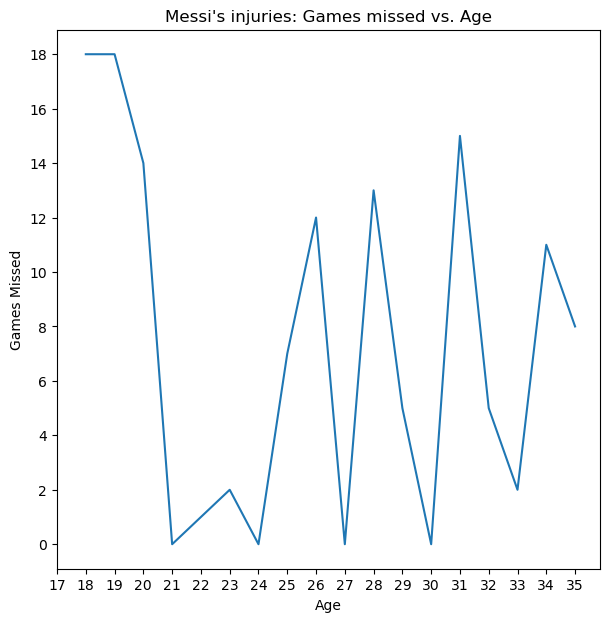

In [20]:
import matplotlib.pyplot as plt
updated_df3.plot(x="age", y=["games_missed"],
        kind="line", figsize=(7, 7))
x_ticks = range(17, 36, 1)
plt.xticks(x_ticks)
y_ticks = range(0, 19, 2)
plt.yticks(y_ticks)

plt.gca().get_legend().remove()
plt.title("Messi's injuries: Games missed vs. Age")
plt.xlabel("Age")
plt.ylabel("Games Missed")
plt.show()

## Second graph and insights

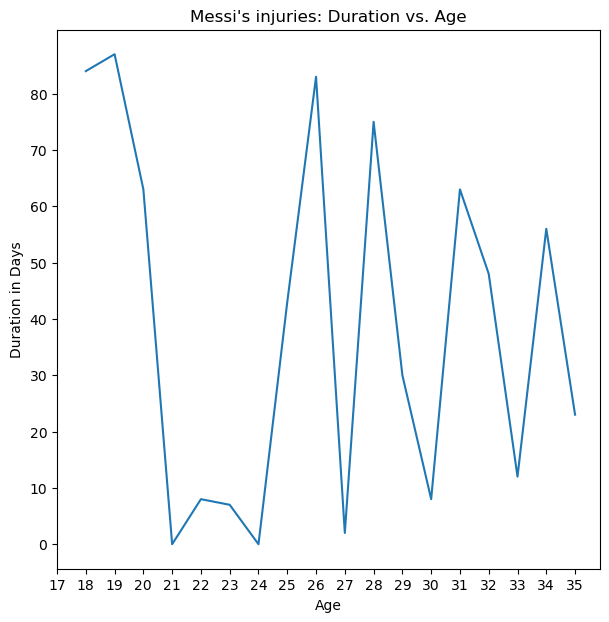

In [21]:
import matplotlib.pyplot as plt
updated_df3.plot(x="age", y=["duration_in_days"],
        kind="line", figsize=(7, 7))
x_ticks = range(17, 36, 1)
plt.xticks(x_ticks)
y_ticks = range(0, 90, 10)
plt.yticks(y_ticks)
plt.gca().get_legend().remove()
plt.title("Messi's injuries: Duration vs. Age")
plt.xlabel("Age")
plt.ylabel("Duration in Days")
plt.show()

The insights below reflect my original thoughts from 2023. I have not revised them. 

We can notice a pattern in Messi injury record. Look at the lowpoints of his injuries in three periods: before the age of 21, between the ages of 21 and 29 and after and including the age of 30. The extent varies, but before the age of 21 and after the age of 29 the lengths of his shortest injuries in those two periods of his career are bigger than the lengths of his shortest injuries between the ages of 21 and 29.